In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
gDNA_c_file = '/project2/kribelba_1515/saadawy/barcode_gDNA_counts.tsv'
mRNA_c_file = '/project2/kribelba_1515/saadawy/barcode_mRNA_counts.tsv'
barcode_mapping_file = '/project2/kribelba_1515/saadawy/barcode_enhancer_mapping.tsv'

In [3]:
gDNA_counts = pd.read_csv(gDNA_c_file, sep='\t')
mRNA_counts = pd.read_csv(mRNA_c_file, sep='\t')
barcode_mapping = pd.read_csv(barcode_mapping_file, sep='\t')

In [4]:
gDNA_counts

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,gDNA_rep5
0,CTACAATCACAA,2182,1916,2567,2194,2070
1,CGCACTTAAAAC,2093,6212,9785,5734,8312
2,GAAACATCTTCC,13547,25639,31943,18795,26008
3,TTTCCCGGCAAG,14330,33127,38045,22147,27850
4,AATGTCTAAAAG,14426,30041,35140,22666,34493
...,...,...,...,...,...,...
845674,CACTAACCACCT,0,0,0,0,1
845675,CTAATAAAGAAG,0,0,0,0,1
845676,AATCTTACGATA,0,0,0,0,1
845677,CACCTAATAACC,0,0,0,0,1


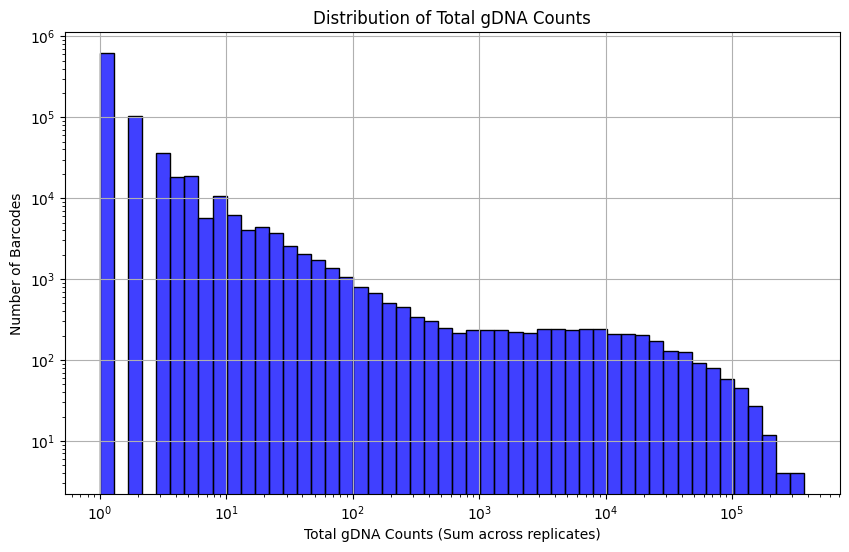

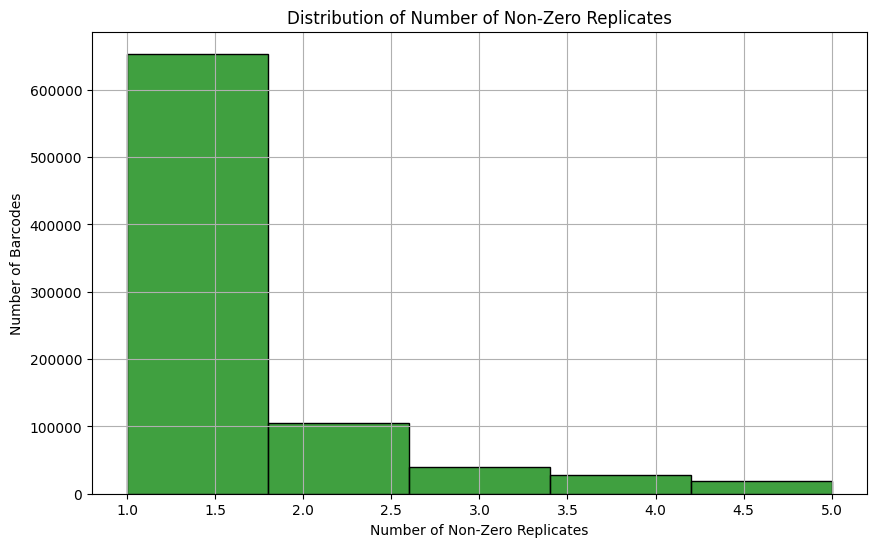

In [5]:
gDNA_visualization = gDNA_counts.copy()
gDNA_replicate_cols = ['gDNA_rep1', 'gDNA_rep2', 'gDNA_rep3', 'gDNA_rep4', 'gDNA_rep5']
gDNA_visualization['Total_gDNA_Count'] = gDNA_visualization[gDNA_replicate_cols].sum(axis=1)
gDNA_visualization['Number_Non_Zero_Replicates'] = (gDNA_visualization[gDNA_replicate_cols] > 0).sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(gDNA_visualization['Total_gDNA_Count'], bins=50, color='blue', kde=False, log_scale=(True))

plt.xlabel('Total gDNA Counts (Sum across replicates)')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Total gDNA Counts')

plt.xticks()
plt.yticks()
plt.yscale('log')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(gDNA_visualization['Number_Non_Zero_Replicates'], bins=5, color='green', kde=False)

plt.xlabel('Number of Non-Zero Replicates')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Number of Non-Zero Replicates')
plt.grid(True)

plt.show()

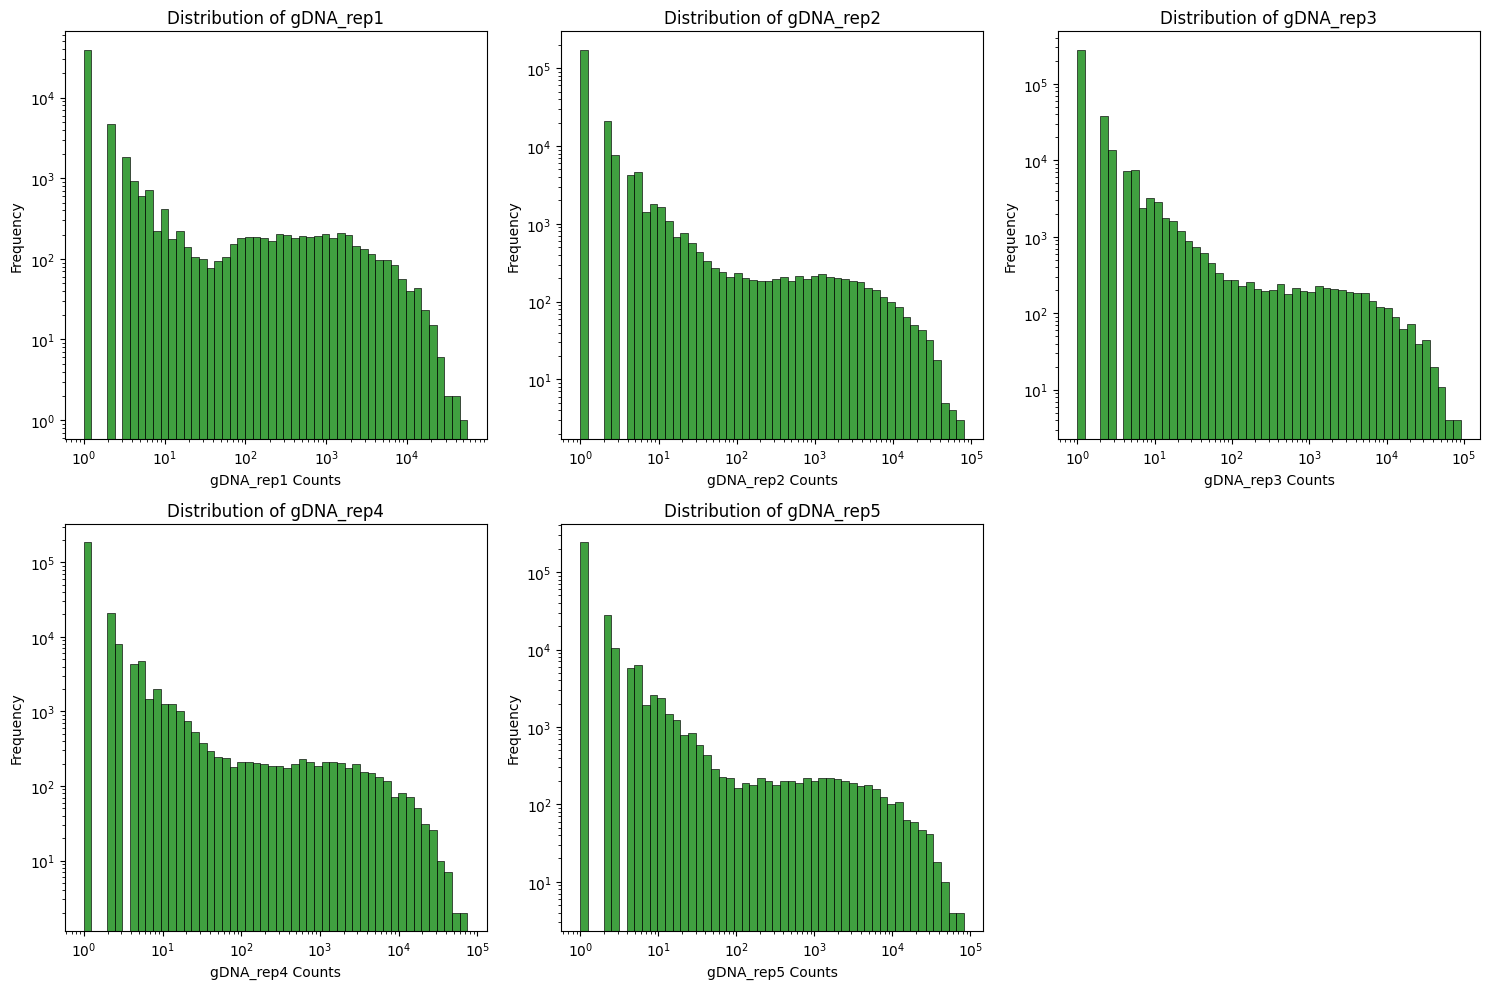

In [6]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(gDNA_replicate_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(gDNA_visualization[col], bins=50, color='green', kde=False, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col} Counts')
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.tight_layout()
plt.show()

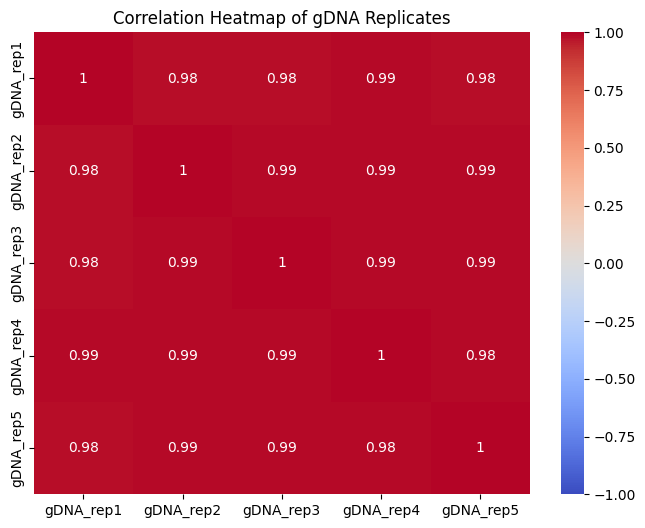

In [6]:
corr_matrix = gDNA_visualization[gDNA_replicate_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of gDNA Replicates')

plt.show()

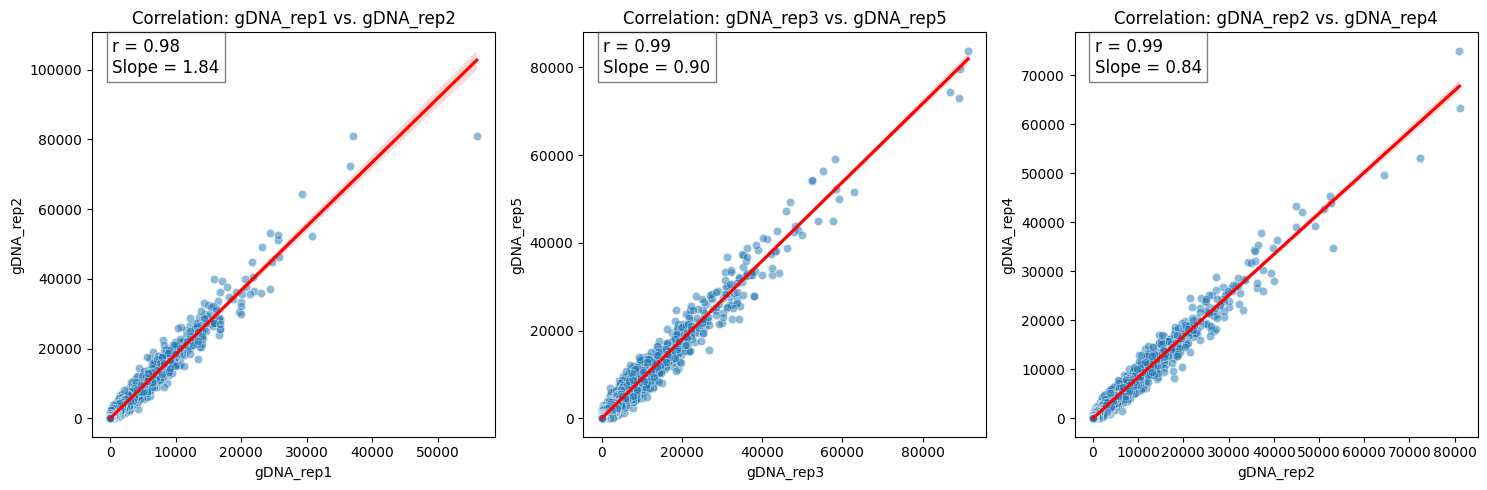

In [15]:
replicate_pairs = [("gDNA_rep1", "gDNA_rep2"), 
                   ("gDNA_rep3", "gDNA_rep5"), 
                   ("gDNA_rep2", "gDNA_rep4")]

plt.figure(figsize=(15, 5))

for i, (rep1, rep2) in enumerate(replicate_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=gDNA_counts[rep1], y=gDNA_counts[rep2], alpha=0.5)
    
    sns.regplot(x=gDNA_counts[rep1], y=gDNA_counts[rep2], scatter=False, color="red")

    r_value, p_value = stats.pearsonr(gDNA_counts[rep1], gDNA_counts[rep2])
    slope, intercept, _, _, _ = stats.linregress(gDNA_counts[rep1], gDNA_counts[rep2])

    plt.text(0.05, 0.9, f"r = {r_value:.2f}\nSlope = {slope:.2f}", 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xlabel(rep1)
    plt.ylabel(rep2)
    plt.title(f"Correlation: {rep1} vs. {rep2}")

plt.tight_layout()
plt.show()

In [5]:
mRNA_counts

,sequence,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4,mRNA_rep5
0,ATCTTTCCCTTG,2022632,4152958,1734773,4793584,2671185
1,ACCCACGTTCAG,164029,485576,153708,480350,195942
2,CGAACCAAGCAT,228066,535795,397328,506997,396643
3,TCCAAGTATGTG,3539,0,0,10371,0
4,CAGACATCTGCA,10255,24594,0,6874,48560
...,...,...,...,...,...,...
344210,ACATTTGTCACT,0,0,0,0,1
344211,TGCCCACTCCTT,0,0,0,0,1
344212,TAACAATCAACG,0,0,0,0,1
344213,CGTACTAACGCA,0,0,0,0,1


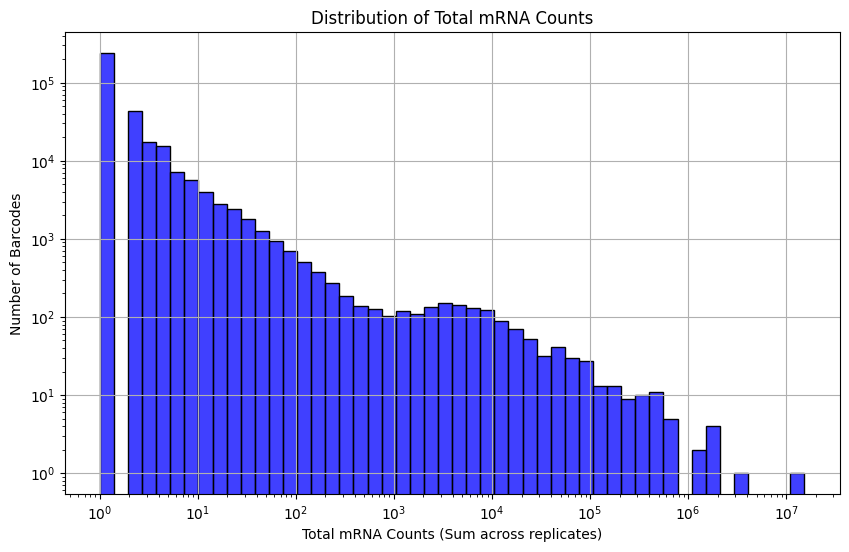

In [20]:
mRNA_visualization = mRNA_counts.copy()
mRNA_replicate_cols = ['mRNA_rep1', 'mRNA_rep2', 'mRNA_rep3', 'mRNA_rep4', 'mRNA_rep5']

mRNA_visualization['Total_mRNA_Count'] = mRNA_visualization[mRNA_replicate_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(mRNA_visualization['Total_mRNA_Count'], bins=50, color='blue', kde=False, log_scale=True)

plt.xlabel('Total mRNA Counts (Sum across replicates)')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Total mRNA Counts')

plt.xticks()
plt.yticks()
plt.yscale('log')
plt.grid(True)
plt.show()

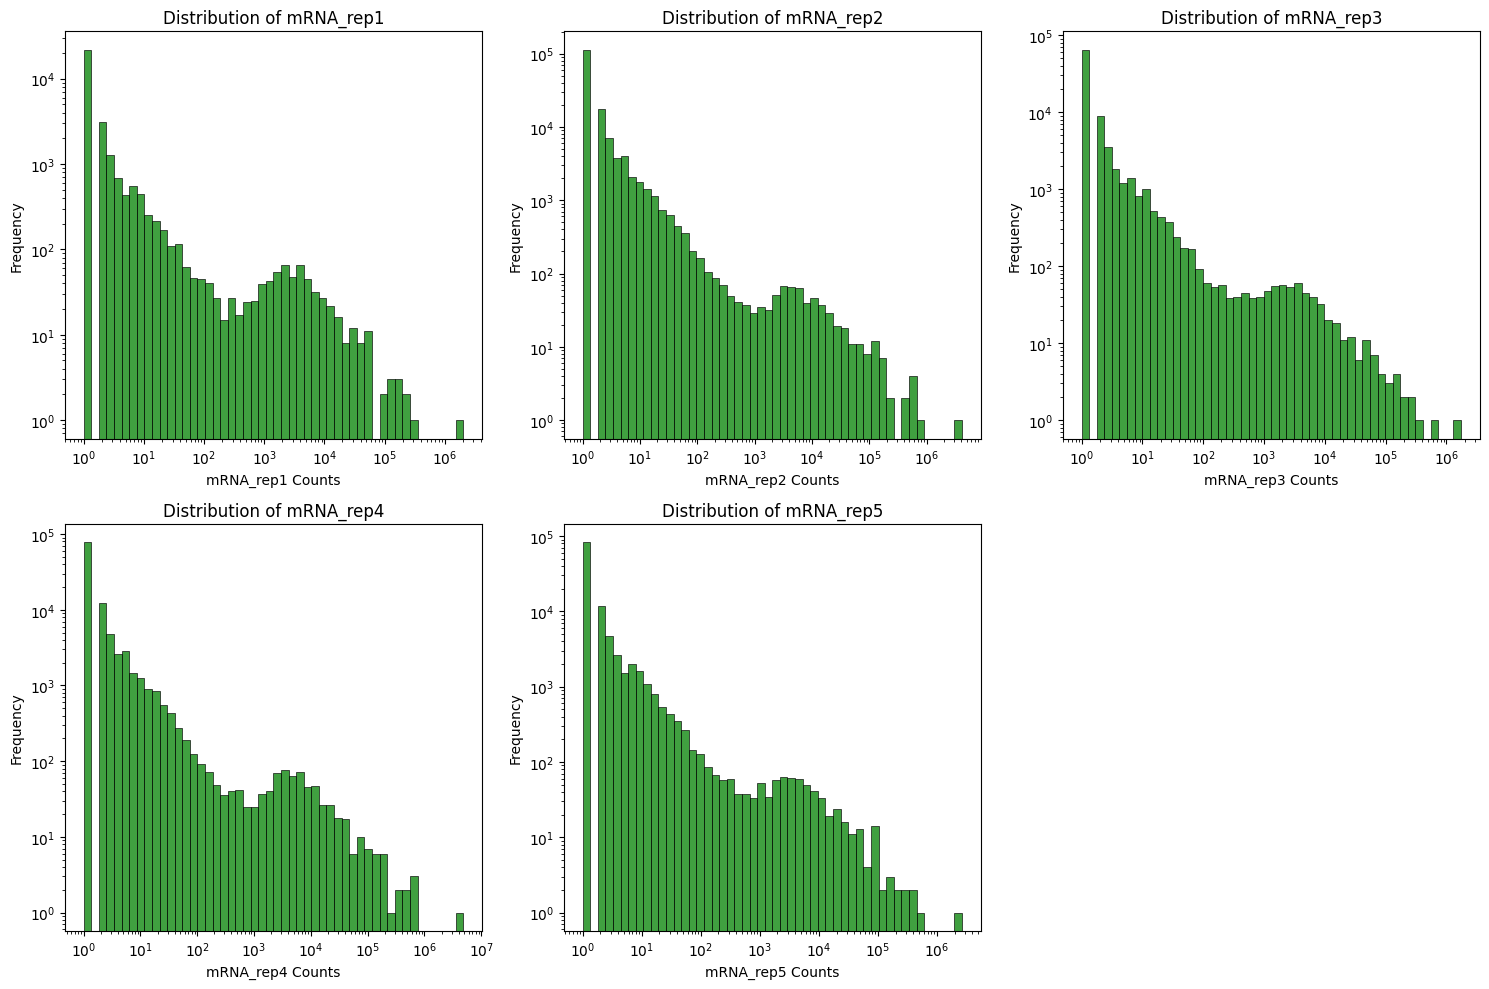

In [8]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(mRNA_replicate_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(mRNA_visualization[col], bins=50, color='green', kde=False, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col} Counts')
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.tight_layout()
plt.show()

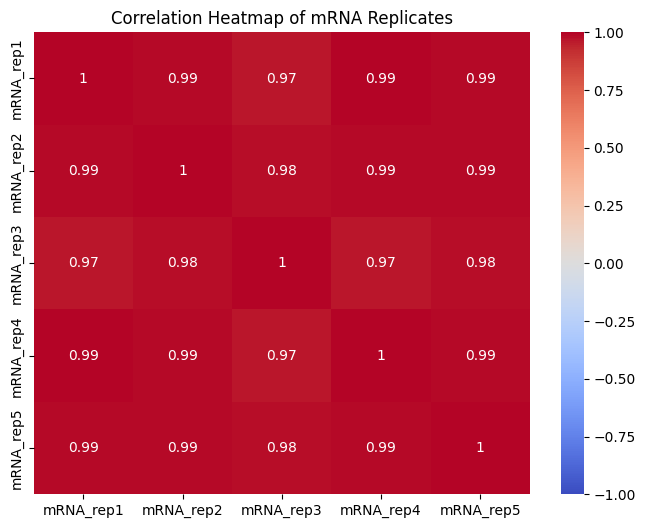

In [9]:
corr_matrix = mRNA_visualization[mRNA_replicate_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of mRNA Replicates')

plt.show()

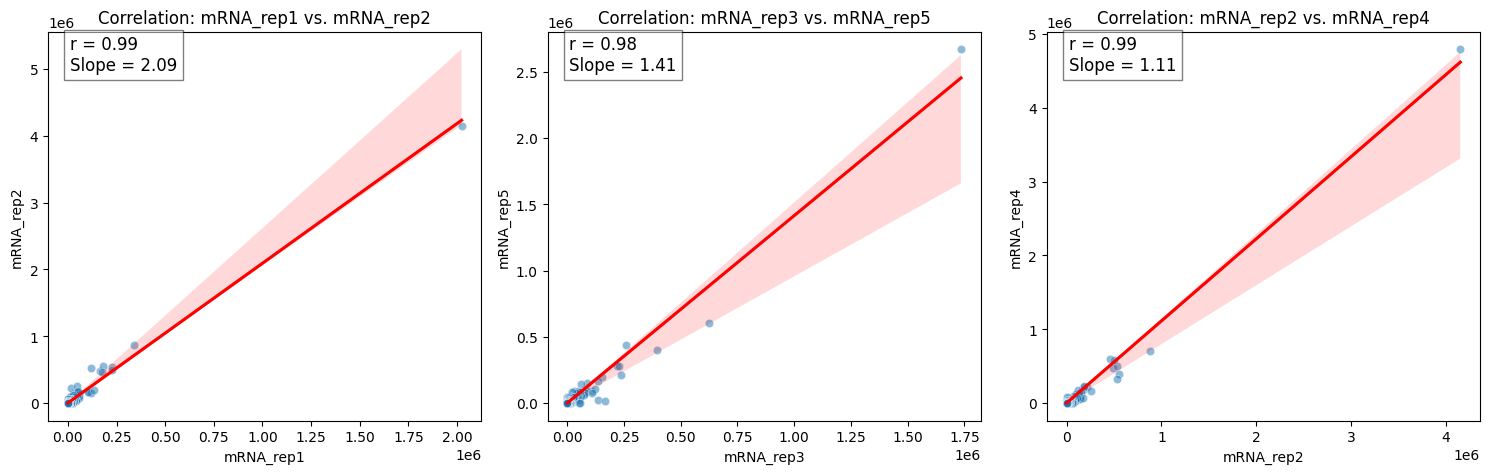

In [14]:
replicate_pairs = [("mRNA_rep1", "mRNA_rep2"), 
                   ("mRNA_rep3", "mRNA_rep5"), 
                   ("mRNA_rep2", "mRNA_rep4")]

plt.figure(figsize=(15, 5))

for i, (rep1, rep2) in enumerate(replicate_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=mRNA_counts[rep1], y=mRNA_counts[rep2], alpha=0.5)
    
    sns.regplot(x=mRNA_counts[rep1], y=mRNA_counts[rep2], scatter=False, color="red")

    r_value, p_value = stats.pearsonr(mRNA_counts[rep1], mRNA_counts[rep2])
    slope, intercept, _, _, _ = stats.linregress(mRNA_counts[rep1], mRNA_counts[rep2])

    plt.text(0.05, 0.9, f"r = {r_value:.2f}\nSlope = {slope:.2f}", 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xlabel(rep1)
    plt.ylabel(rep2)
    plt.title(f"Correlation: {rep1} vs. {rep2}")

plt.tight_layout()
plt.show()

In [6]:
barcode_mapping

,Barcode_Seq,Enhancer
0,AAAAAAAAAAAC,PU1_CTCF_PU1_2
1,AAAAAAAAAAAG,RUNX3_MEF2_1
2,AAAAAAAAAAGG,FOXO_CTCF_1
3,AAAAAAAAAATA,MYC_RUNX3_MYC_3
4,AAAAAAAAAATC,PU1_NFKB_2
...,...,...
226226,TTTTTTTGAAAC,FOXO_PU1_FOXO_FOXO_3
226227,TTTTTTTGCATG,IRF_MYC_IRF_3
226228,TTTTTTTGTACA,FOXO_FOXO_3
226229,TTTTTTTGTATT,RUNX3_MYC_RUNX3_2


In [17]:
# filtering to keep only barcodes with a total count of 10 across all replicates, and this 10 must come from at least 3 replicates, so 12 0 0 0 0 isn't allowed

replicate_columns = ['gDNA_rep1', 'gDNA_rep2', 'gDNA_rep3', 'gDNA_rep4', 'gDNA_rep5']

# compute total counts per barcode
gDNA_counts['total_counts'] = gDNA_counts[replicate_columns].sum(axis=1)

# how many replicates contribute to the total
gDNA_counts['nonzero_replicates'] = (gDNA_counts[replicate_columns] > 0).sum(axis=1)

# total count ≥ 10 and at least 3 replicates contribute
gDNA_counts_filtered = gDNA_counts[(gDNA_counts['total_counts'] >= 100) & (gDNA_counts['nonzero_replicates'] >= 3)]

gDNA_counts_filtered = gDNA_counts_filtered.drop(columns=['total_counts', 'nonzero_replicates'])


In [18]:
gDNA_counts_filtered

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,gDNA_rep5
0,CTACAATCACAA,2182,1916,2567,2194,2070
1,CGCACTTAAAAC,2093,6212,9785,5734,8312
2,GAAACATCTTCC,13547,25639,31943,18795,26008
3,TTTCCCGGCAAG,14330,33127,38045,22147,27850
4,AATGTCTAAAAG,14426,30041,35140,22666,34493
...,...,...,...,...,...,...
299025,TTTCAACCAAAA,0,0,1,128,502
299545,TAAAGACAATAG,0,0,1,50,284
335089,TATTAACATATT,0,0,1,106,138
376209,CATAACTGCAAA,0,0,1,158,132


In [8]:
# let's see how many intersect
print(len(set(gDNA_counts_filtered['sequence']) & set(mRNA_counts['sequence'])))

16394


In [9]:
barcode_counts = pd.merge(gDNA_counts_filtered, mRNA_counts, on='sequence')

In [10]:
barcode_counts
# indeed, the correct number of intersected barcodes found in both gDNA and mRNA

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,gDNA_rep5,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4,mRNA_rep5
0,GAAACATCTTCC,13547,25639,31943,18795,26008,0,2,1,0,0
1,TTTCCCGGCAAG,14330,33127,38045,22147,27850,1,6611,1,1,3307
2,AATGTCTAAAAG,14426,30041,35140,22666,34493,4515,3,1486,2,0
3,TATGAATCAACT,2156,5017,6582,4965,5356,0,0,1,0,0
4,CACTTATGAAAA,13374,27433,32372,21196,30345,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
16389,GTGAGTGGCTCG,0,0,1,5,7,1,0,0,4,0
16390,ACCTGCGCGGCC,0,0,1,7,4,1,5,9,6,6
16391,TCAATTCATCAG,0,0,1,4,13,0,0,11,3,12
16392,CATATGTGCAAG,0,0,1,7,3,0,0,0,0,2


In [11]:
# for any mRNA_replicate{i} and gDNA_replicate{i}, if the mRNA value is > 0 and the gDNA value is = 0, set the mRNA value = 0

for i in range(1, 6): # looping over the replicate columns
    gDNA_col = f"gDNA_rep{i}"
    mRNA_col = f"mRNA_rep{i}"
    
    # If gDNA is 0 but mRNA is positive, set mRNA to 0
    barcode_counts.loc[barcode_counts[gDNA_col] == 0, mRNA_col] = 0

In [12]:
barcode_counts

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,gDNA_rep5,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4,mRNA_rep5
0,GAAACATCTTCC,13547,25639,31943,18795,26008,0,2,1,0,0
1,TTTCCCGGCAAG,14330,33127,38045,22147,27850,1,6611,1,1,3307
2,AATGTCTAAAAG,14426,30041,35140,22666,34493,4515,3,1486,2,0
3,TATGAATCAACT,2156,5017,6582,4965,5356,0,0,1,0,0
4,CACTTATGAAAA,13374,27433,32372,21196,30345,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
16389,GTGAGTGGCTCG,0,0,1,5,7,0,0,0,4,0
16390,ACCTGCGCGGCC,0,0,1,7,4,0,0,9,6,6
16391,TCAATTCATCAG,0,0,1,4,13,0,0,11,3,12
16392,CATATGTGCAAG,0,0,1,7,3,0,0,0,0,2


In [13]:
mapped_barcodes = pd.merge(barcode_counts, barcode_mapping[['Barcode_Seq', 'Enhancer']], left_on='sequence', right_on='Barcode_Seq', how='inner')

mapped_barcodes.drop(columns=['Barcode_Seq'], inplace=True)

In [14]:
mapped_barcodes

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,gDNA_rep5,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4,mRNA_rep5,Enhancer
0,GAAACATCTTCC,13547,25639,31943,18795,26008,0,2,1,0,0,RUNX3_2
1,TTTCCCGGCAAG,14330,33127,38045,22147,27850,1,6611,1,1,3307,RUNX3_NFKB_3
2,AATGTCTAAAAG,14426,30041,35140,22666,34493,4515,3,1486,2,0,RUNX3_PU1_RUNX3_3
3,TATGAATCAACT,2156,5017,6582,4965,5356,0,0,1,0,0,PU1_MEF2_3
4,CACTTATGAAAA,13374,27433,32372,21196,30345,0,1,0,0,1,RUNX3_IRF_RUNX3_2
...,...,...,...,...,...,...,...,...,...,...,...,...
2064,TAACAAAATCAA,0,0,2,1,7,0,0,0,1,0,MYC_MYC_MYC_3
2065,CGCTATAAAGCC,0,0,7,4,4,0,0,9,0,20,RUNX3_RUNX3_RUNX3_3
2066,ATATAACTAACG,0,0,6,3,2,0,0,0,1,0,CTCF_1
2067,TATTCCTAAAAA,0,0,4,4,5,0,0,1,0,0,FOXO_CTCF_FOXO_3


In [16]:
# mapped_barcodes.to_csv('barcode_counts.tsv', sep='\t', index=False)

In [17]:
gDNA_replicate_columns = [f"gDNA_rep{i}" for i in range(1, 6)]
mRNA_replicate_columns = [f"mRNA_rep{i}" for i in range(1, 6)]

counts_matrix = mapped_barcodes[['sequence', 'Enhancer']].copy()
counts_matrix['gDNA_counts_sum'] = mapped_barcodes[gDNA_replicate_columns].sum(axis=1)
counts_matrix['gDNA_counts_avg'] = mapped_barcodes[gDNA_replicate_columns].mean(axis=1)
counts_matrix['mRNA_counts_sum'] = mapped_barcodes[mRNA_replicate_columns].sum(axis=1)
counts_matrix['mRNA_counts_avg'] = mapped_barcodes[mRNA_replicate_columns].mean(axis=1)

In [18]:
counts_matrix

,sequence,Enhancer,gDNA_counts_sum,gDNA_counts_avg,mRNA_counts_sum,mRNA_counts_avg
0,GAAACATCTTCC,RUNX3_2,115932,23186.4,3,0.6
1,TTTCCCGGCAAG,RUNX3_NFKB_3,135499,27099.8,9921,1984.2
2,AATGTCTAAAAG,RUNX3_PU1_RUNX3_3,136766,27353.2,6006,1201.2
3,TATGAATCAACT,PU1_MEF2_3,24076,4815.2,1,0.2
4,CACTTATGAAAA,RUNX3_IRF_RUNX3_2,124720,24944.0,2,0.4
...,...,...,...,...,...,...
2064,TAACAAAATCAA,MYC_MYC_MYC_3,10,2.0,1,0.2
2065,CGCTATAAAGCC,RUNX3_RUNX3_RUNX3_3,15,3.0,29,5.8
2066,ATATAACTAACG,CTCF_1,11,2.2,1,0.2
2067,TATTCCTAAAAA,FOXO_CTCF_FOXO_3,13,2.6,1,0.2


In [88]:
# counts_matrix.to_csv('counts_matrix.tsv', sep='\t', index=False)